In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Set smaller grid size for testing
GRID_SIZE = 10
NUM_OBSTACLES = 10
ACTION_SPACE = ['UP', 'DOWN', 'LEFT', 'RIGHT']
gamma = 0.9
theta = 1e-4
max_iterations = 100

# Initialize grid and place obstacles
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for _ in range(NUM_OBSTACLES):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        grid[x, y] = 1
    return grid

# Ensure start and goal are open cells
def initialize_start_goal(grid):
    start, goal = (0, 0), (GRID_SIZE - 1, GRID_SIZE - 1)
    while grid[start] == 1:
        start = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    while grid[goal] == 1:
        goal = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    return start, goal

# Reward function
def reward(state):
    if state == goal:
        return 10
    elif grid[state] == 1:
        return -10
    else:
        return -1

# Transition model
def transition(state, action):
    x, y = state
    if action == 'UP':
        next_state = (max(x - 1, 0), y)
    elif action == 'DOWN':
        next_state = (min(x + 1, GRID_SIZE - 1), y)
    elif action == 'LEFT':
        next_state = (x, max(y - 1, 0))
    elif action == 'RIGHT':
        next_state = (x, min(y + 1, GRID_SIZE - 1))
    return next_state if grid[next_state] == 0 else state

# Value Iteration with debug output
def value_iteration():
    global V
    for i in range(max_iterations):
        delta = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                state = (x, y)
                if state == goal:
                    continue
                v = V[state]
                new_value = max(reward(state) + gamma * V[transition(state, a)] for a in ACTION_SPACE)
                V[state] = new_value
                delta = max(delta, abs(v - new_value))
        print(f"Iteration {i}, max delta: {delta}")
        if delta < theta:
            print("Converged!")
            break
    else:
        print("Reached maximum iterations without full convergence.")

# Extract policy with debug output
def extract_policy():
    policy = {}
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            state = (x, y)
            if state == goal:
                policy[state] = None
            else:
                best_action = max(ACTION_SPACE, key=lambda a: reward(state) + gamma * V[transition(state, a)])
                policy[state] = best_action
                print(f"Policy for state {state}: {best_action}")  # Debug output for each policy decision
    return policy


Start: (0, 0)
Goal: (9, 9)
Grid with obstacles:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Iteration 0, max delta: 10.0
Iteration 1, max delta: 0.9000000000000004
Iteration 2, max delta: 0.8100000000000005
Iteration 3, max delta: 0.7290000000000001
Iteration 4, max delta: 0.6561000000000003
Iteration 5, max delta: 0.5904900000000008
Iteration 6, max delta: 0.531441
Iteration 7, max delta: 0.47829690000000014
Iteration 8, max delta: 0.43046720999999977
Iteration 9, max delta: 0.38742048900000015
Iteration 10, max delta: 0.3486784401000005
Iteration 11, max delta: 0.3138105960900006
Iteration 12, max delta: 0.28242953648099967
Iteration 13, max delta: 0.25418658283290085
Iteration 14, max delta: 0.228767

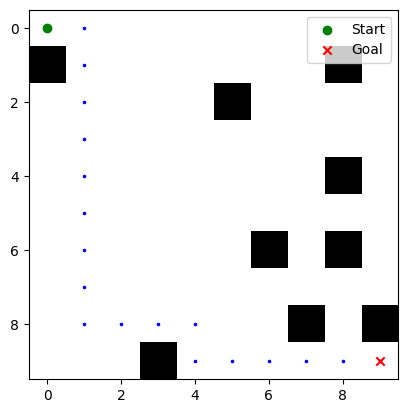

In [4]:

# Initialize grid, start, and goal
grid = create_grid()
start, goal = initialize_start_goal(grid)

# Verify start and goal positions
print("Start:", start)
print("Goal:", goal)
print("Grid with obstacles:\n", grid)

# Initialize the value function
V = np.zeros((GRID_SIZE, GRID_SIZE))

# Run Value Iteration
value_iteration()

# Extract and print the policy
policy = extract_policy()
print("Optimal policy extracted.")

# Evaluate and display path taken
def evaluate_policy(start, policy):
    state = start
    steps = 0
    path = [state]
    while state != goal and steps < GRID_SIZE * 2:  # Avoid infinite loop
        action = policy.get(state)
        if action is None:
            break
        next_state = transition(state, action)
        if next_state == state:
            print(f"Agent stuck at state {state} with action {action}")
            break
        state = next_state
        path.append(state)
        steps += 1
    return path, steps

path, steps = evaluate_policy(start, policy)
print("Path taken:", path)
print("Number of steps to goal:", steps)

# Plot the path
def plot_path(grid, path, start, goal):
    plt.imshow(grid, cmap='gray_r')
    for (y, x) in path:
        plt.scatter(x, y, c='blue', marker='.', s=10)
    plt.scatter(start[1], start[0], c='green', marker='o', label="Start")
    plt.scatter(goal[1], goal[0], c='red', marker='x', label="Goal")
    plt.legend()
    plt.show()

plot_path(grid, path, start, goal)